In [132]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [144]:
# Data dimensions
ALINES_PER_BSCAN = 256
BSCANS_PER_VOLUME = 256
VOLUMES_PER_VIDEO = 16

# - OCT
ALINE_LENGTH = 2048

# - SLO
SAMPLES_PER_ALINE = 4

# Video files
#slo_scan_pattern = "K:/data_nhp/slo_scan_pattern/slo_video_data_08_03_14h44m29s530ms.bin"
slo_image_file_100k = "K:/data_nhp/slo_data_081023/100kHz/slo_video_data_08_10_14h29m00s910ms.bin"
slo_image_file_500k = "K:/data_nhp/slo_data_081023/500kHz/slo_video_data_08_10_14h31m35s941ms.bin"
#oct_video_bot_file = "K:/data_nhp/slo_image_data_20230801/video_data_bot_20230801_15h41m49s837ms.bin"

## Sum of Samples

In [145]:
# Process data
#--------------
# - Open raw data
slo_image_data_100k = np.fromfile(slo_image_file_100k)
slo_image_data_100k = slo_image_data_100k.reshape((VOLUMES_PER_VIDEO,
                                         BSCANS_PER_VOLUME,
                                         SAMPLES_PER_ALINE * ALINES_PER_BSCAN))

slo_image_data_500k = np.fromfile(slo_image_file_500k)
slo_image_data_500k = slo_image_data_500k.reshape((VOLUMES_PER_VIDEO,
                                         BSCANS_PER_VOLUME,
                                         SAMPLES_PER_ALINE * ALINES_PER_BSCAN))

temp_100k = np.zeros((VOLUMES_PER_VIDEO, BSCANS_PER_VOLUME, ALINES_PER_BSCAN))
temp_500k = np.copy(temp_100k)

# - Sum of samples
for vi in range(0, VOLUMES_PER_VIDEO):
    for bi in range(0, BSCANS_PER_VOLUME):
        for ai in range(0, ALINES_PER_BSCAN):
            temp_100k[vi, bi, ai] = sum(slo_image_data_100k[vi, bi,
                                                  (ai*SAMPLES_PER_ALINE):(ai*SAMPLES_PER_ALINE + SAMPLES_PER_ALINE)])
            temp_500k[vi, bi, ai] = sum(slo_image_data_500k[vi, bi,
                                                  (ai*SAMPLES_PER_ALINE):(ai*SAMPLES_PER_ALINE + SAMPLES_PER_ALINE)])

# - Horizontal flipping
temp_100k[:, 1::2, :] = temp_100k[:, 1::2, ::-1]
temp_500k[:, 1::2, :] = temp_500k[:, 1::2, ::-1]
        
# - Vertical flipping
temp_100k[1::2, :, :] = temp_100k[1::2, ::-1, :]
temp_500k[1::2, :, :] = temp_500k[1::2, ::-1, :]

sum_image_100k = np.copy(temp_100k)
sum_image_500k = np.copy(temp_500k)

Text(0.5, 1.0, '500kHz Cutoff')

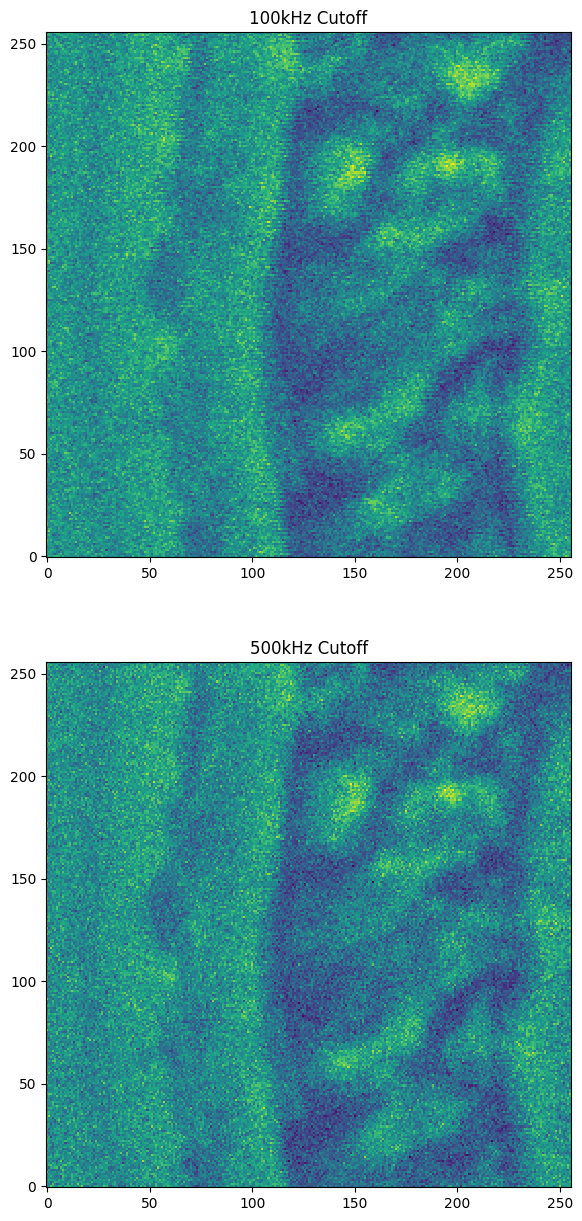

In [152]:
# Display Image
volume_index = 3
#plt.imshow(sum_image[volume_index,:,:], origin='lower', interpolation='none', vmin=-2, vmax=0)

f, axarr = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(25, 15)
axarr[0].imshow(-sum_image_100k[volume_index,:,:], origin='lower', interpolation='none')#, vmin=-2, vmax=0)
axarr[0].set_title('100kHz Cutoff')
axarr[1].imshow(-sum_image_500k[volume_index,:,:], origin='lower', interpolation='none')#, vmin=-2, vmax=0)
axarr[1].set_title('500kHz Cutoff')

## Average Image Across Volumes

Text(0.5, 1.0, '500kHz Cutoff')

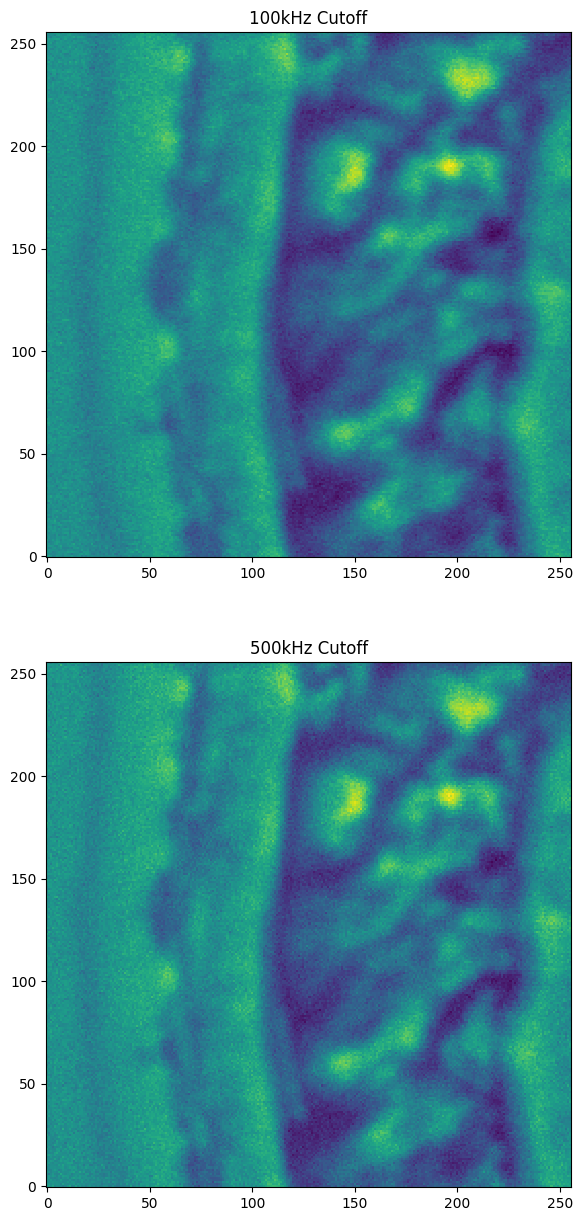

In [176]:
# Display Image with average of pixels
temp_100k = np.zeros((BSCANS_PER_VOLUME, ALINES_PER_BSCAN))
temp_500k = np.copy(temp_100k)
for bi in range(0, BSCANS_PER_VOLUME):
    for ai in range(0, ALINES_PER_BSCAN):
        temp_100k[bi, ai] = np.mean(sum_image_100k[:,bi,ai])
        temp_500k[bi, ai] = np.mean(sum_image_500k[:,bi,ai])
        
vol_avg_image_100k = temp_100k
vol_avg_image_500k = temp_500k

f, axarr = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(25, 15)
axarr[0].imshow(-vol_avg_image_100k, origin='lower', interpolation='none')#, vmin=-2, vmax=0)
axarr[0].set_title('100kHz Cutoff')
axarr[1].imshow(-vol_avg_image_500k, origin='lower', interpolation='none')#, vmin=-2, vmax=0)
axarr[1].set_title('500kHz Cutoff')

### Single Row Comparison

Text(0.5, 1.0, 'Difference')

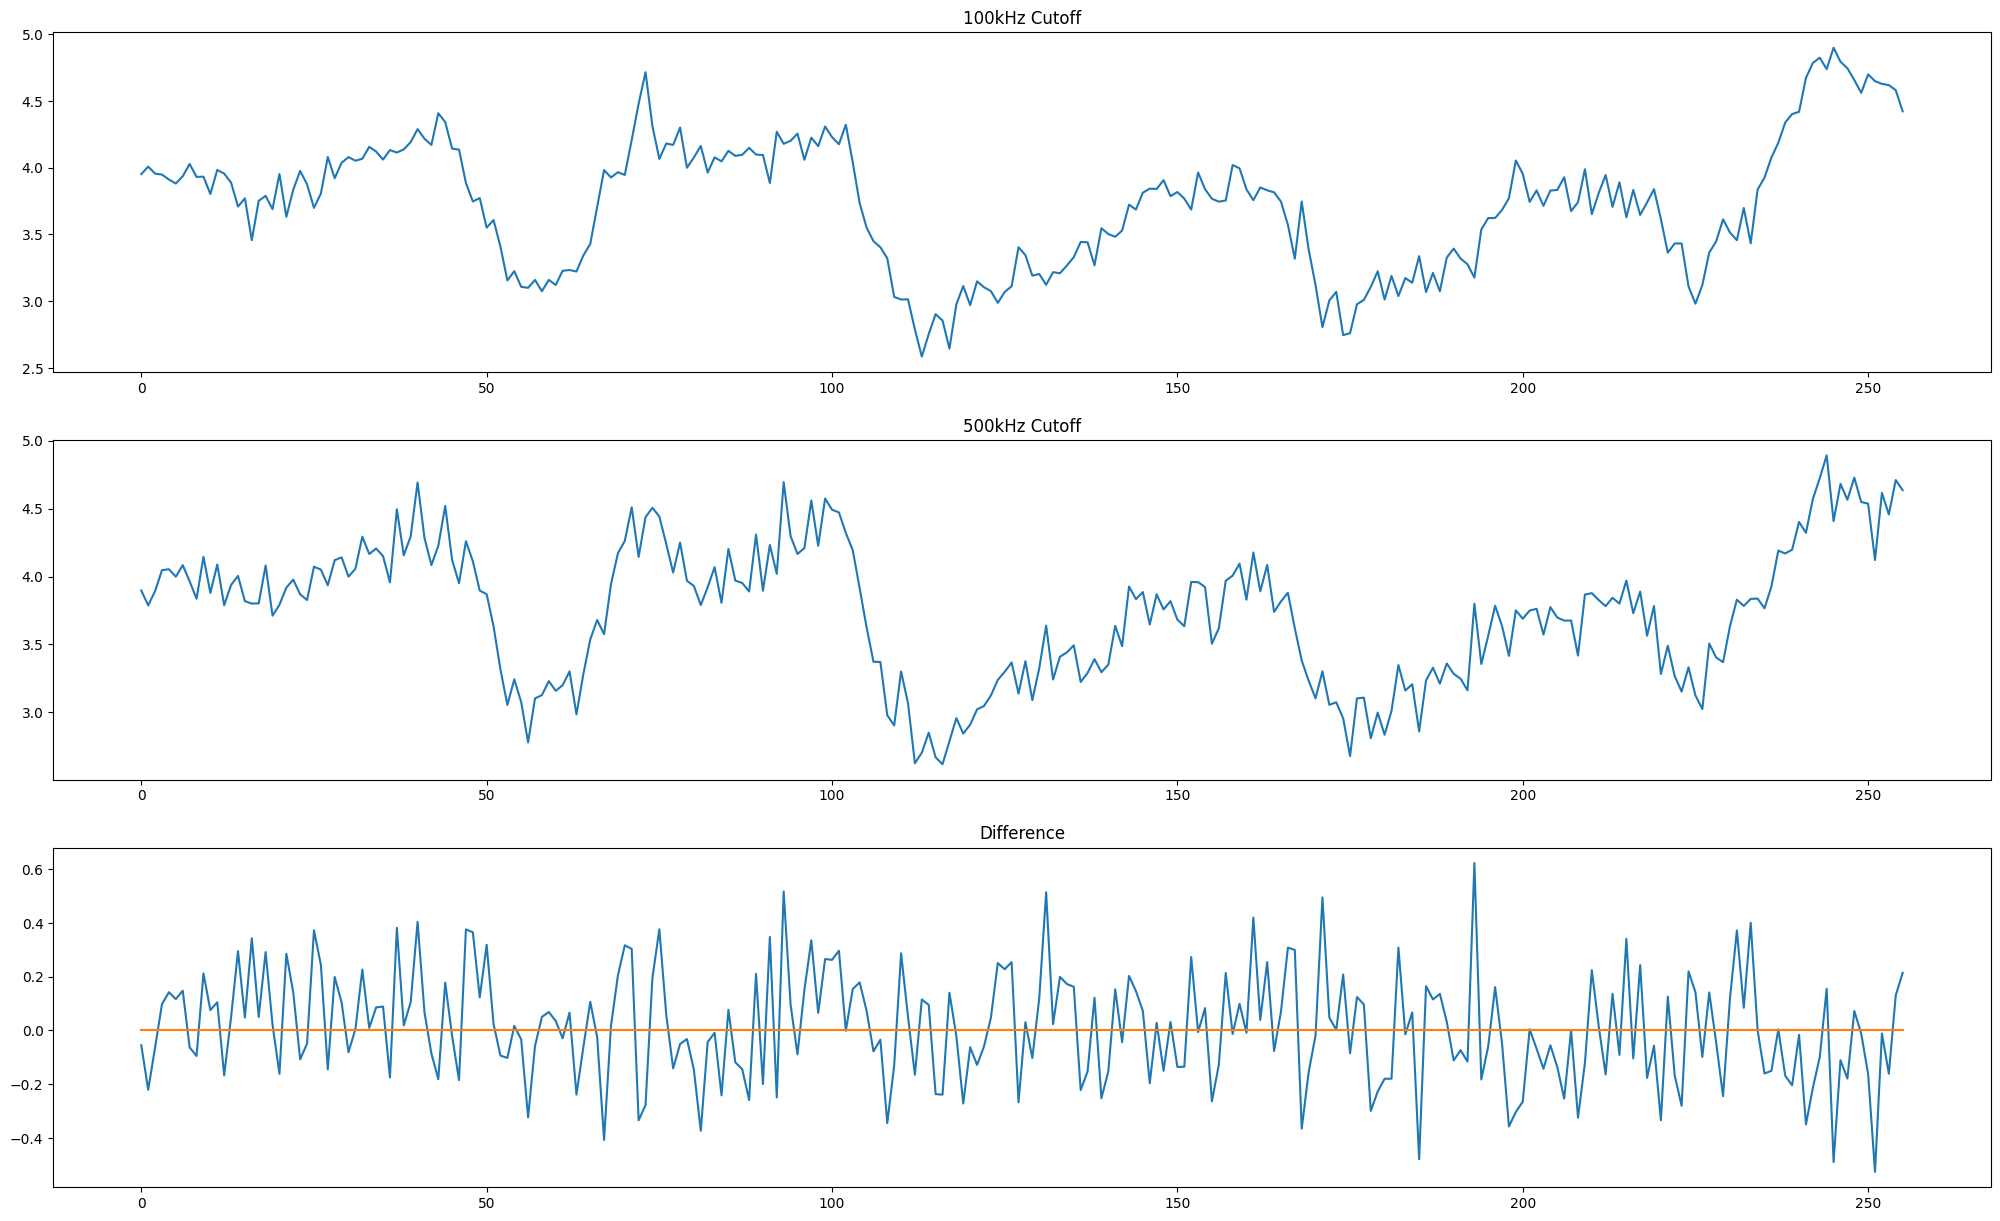

In [177]:
bscan_index = 125

f, axarr = plt.subplots(3)
fig = plt.gcf()
fig.set_size_inches(25, 15)
axarr[0].plot(-vol_avg_image_100k[bscan_index, :])#, vmin=-2, vmax=0)
axarr[0].set_title('100kHz Cutoff')
axarr[1].plot(-vol_avg_image_500k[bscan_index, :])#, vmin=-2, vmax=0)
axarr[1].set_title('500kHz Cutoff')
axarr[2].plot(vol_avg_image_100k[bscan_index, :] - vol_avg_image_500k[bscan_index, :])
axarr[2].plot(np.zeros(ALINES_PER_BSCAN))
axarr[2].set_title('Difference')

## Standard Deviation Analysis of Image Patch
<p>An analysis of the standard deviations for the patch [0:25, 0:25] for both sum images</p>

In [163]:
patch_start_bscan = 0
patch_end_bscan = 250
patch_start_aline = 0
patch_end_aline = 125

sd_100k = np.zeros(VOLUMES_PER_VIDEO)
sd_500k = np.copy(sd_100k)

for vi in range(0, VOLUMES_PER_VIDEO):
    sd_100k[vi] = np.std(sum_image_100k[vi, patch_start_bscan:patch_end_bscan, patch_start_aline:patch_end_aline])
    sd_500k[vi] = np.std(sum_image_500k[vi, patch_start_bscan:patch_end_bscan, patch_start_aline:patch_end_aline])

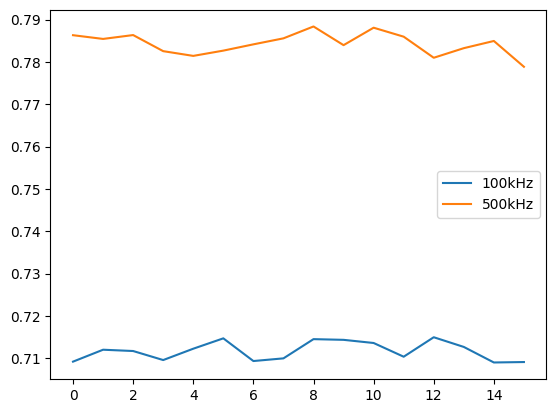

In [168]:
plt.plot(sd_100k, label='100kHz')
plt.plot(sd_500k, label='500kHz')
plt.title = 'SD for selected patch for each Volume'
plt.legend()
plt.show()

---
# Older

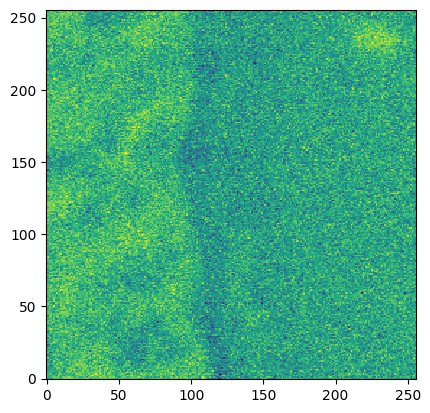

In [117]:
# Display Image with average of pixels
temp_100k = np.zeros((VOLUMES_PER_VIDEO, BSCANS_PER_VOLUME, ALINES_PER_BSCAN))
temp_500k = np.copy(temp_100k)

for vi in range(0, VOLUMES_PER_VIDEO):
    for bi in range(0, BSCANS_PER_VOLUME):
        for ai in range(0, ALINES_PER_BSCAN):
            temp_100k[vi, bi, ai] = np.mean(slo_image_data_100k[vi, bi, (ai*SAMPLES_PER_ALINE):((ai+1)*SAMPLES_PER_ALINE)])
            temp_500k[vi, bi, ai] = np.mean(slo_image_data_500k[vi, bi, (ai*SAMPLES_PER_ALINE):((ai+1)*SAMPLES_PER_ALINE)])
            
#avg_image_unflipped = np.copy(temp)

temp_100k[:, 1::2, :] = temp_100k[:, 1::2, ::-1]
temp_500k[:, 1::2, :] = temp_500k[:, 1::2, ::-1]
temp_100k[1::2, :, :] = temp_100k[1::2, ::-1, :]
temp_500k[1::2, :, :] = temp_500k[1::2, ::-1, :]

avg_image = np.copy(temp)

plt.imshow(avg_image[volume_index,:,:], origin='lower', interpolation='none')#, vmin=-2, vmax=0)

## Average of Samples

## First Sample Only

<p> Note: The data in the displays is scaled to [0,1] for visibility. The actual data may be a different scale. Uncomment vmin and vmax arguments to see actual difference </p>

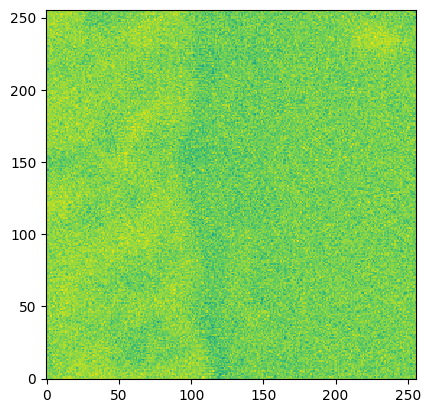

In [110]:
# Display Image without sum of pixels
temp = np.zeros((VOLUMES_PER_VIDEO, BSCANS_PER_VOLUME, ALINES_PER_BSCAN))
for vi in range(0, VOLUMES_PER_VIDEO):
    for bi in range(0, BSCANS_PER_VOLUME):
        for ai in range(0, ALINES_PER_BSCAN):
            temp[vi, bi, ai] = slo_image_data[vi, bi, (ai*SAMPLES_PER_ALINE)]
            
#no_sum_image_unflipped = np.copy(temp)

temp[:, 1::2, :] = temp[:, 1::2, ::-1]
temp[1::2, :, :] = temp[1::2, ::-1, :]

no_sum_image = np.copy(temp)

plt.imshow(no_sum_image[volume_index,:,:], origin='lower', interpolation='none', vmin=-2, vmax=0)

### Difference to Sum

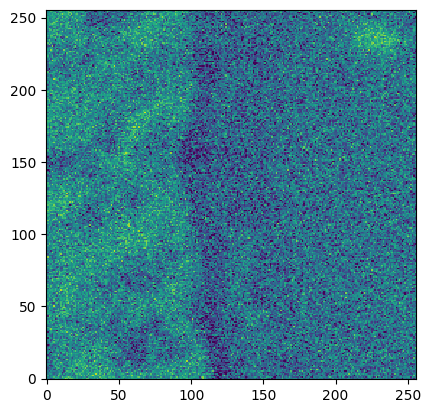

In [112]:
# Display difference of images
difference = sum_image - no_sum_image
plt.imshow(difference[volume_index,:,:], origin='lower', interpolation='none', vmin=-2, vmax=0)

### Difference to Sum

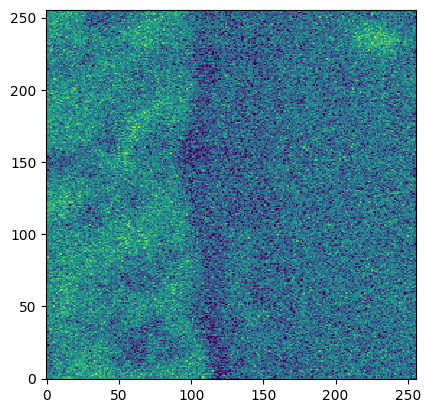

In [114]:
# Display difference of images
difference = sum_image - avg_image
plt.imshow(difference[volume_index,:,:], origin='lower', interpolation='none', vmin=-2, vmax=0)

### Difference to First Sample

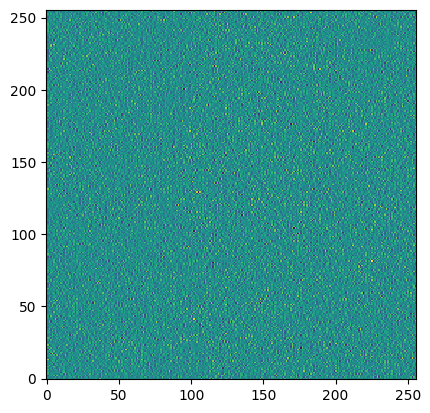

In [115]:
# Display difference of images
difference = no_sum_image - avg_image
plt.imshow(difference[volume_index,:,:], origin='lower', interpolation='none')